# Яловенко Володимир Вікторович
# Кі-21012б
# Варіант 11

**Імпортуємо бібліотеки**

In [8]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Створити програму для генерації довільного масиву із 54 цілих чисел, які не перевищують по модулю 128, з наступними властивостями:
## 1.1. При кожному запуску програми масив повинен бути різним.
## 1.2. Масив повинен містити 30 відсотків від’ємних елементів (розташованих в довільних місцях)

In [9]:
def array_gen(array):
    array_len = 54;
    for i in range(0, array_len):
        array.append(random.randint(0, 128))
        negative_indices = np.random.choice(range(array_len), size=int(array_len * 0.3), replace=False)
    for idx in negative_indices:
        array[idx] = -abs(array[idx])
    
    return array
array = []
array_gen(array);


# 2. Зберегти згенерований масив в файл.

In [10]:
df = pd.DataFrame(array)
df.to_csv("output.csv", index=False)


# 3. Створити програму, яка зчитує із файлу згенерований масив попередньою програмою і виводить його на екран.

In [11]:
array_fromFile = pd.read_csv("output.csv")
array_list = array_fromFile.values.tolist()
array_list = np.concatenate(array_list)
print(array_list)

[-126  -97   46  114  115  -41   69   75  -52   52  -62  -92   60   93
  -34  -53   57    2  101   88   59 -123   16   52   83  119 -119   80
  -77   22   53   68    6   85   97  103   33   19   42  126  126   96
 -125  125 -115   37   57   95   50  -55 -118   32 -103  115]


# 4. Візуалізувати масив за допомогою стовпчастої горизонтальної діаграми. Виділити кольором мінімальний, другий мінімальний та третій мінімальний елементи, а також вказати ці значення на діаграмі. Виділити іншим кольором елементи із інтервалу [a,b], який задає користувач.
# 5. Порахувати номер позиції третього мінімального елемента. 

Введіть початок інтеравлу:  -20
Введіть кінець інтеравлу:  50


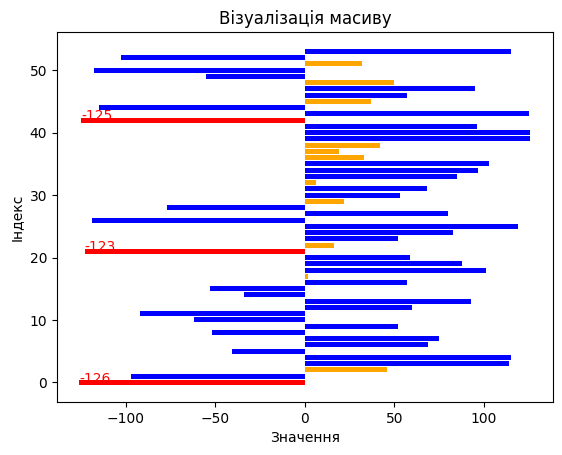

Номер позиції третього мінімального елемента: 0


In [12]:
def visualize_array(array, a=None, b=None):
    sorted_indices = np.argsort(array)
    min_indices = sorted_indices[:3]
    
    colors = ['blue'] * len(array)
    for i in min_indices:
        colors[i] = 'red' 
    
    if a is not None and b is not None:
        interval_indices = np.where((array >= a) & (array <= b))[0]
        for i in interval_indices:
            colors[i] = 'orange'
    
    plt.barh(range(len(array)), array, color=colors)
    for i in min_indices:
        plt.text(array[i], i, str(array[i]), color='red')
    plt.xlabel("Значення")
    plt.ylabel("Індекс")
    plt.title("Візуалізація масиву")
    plt.show()
    print(f"Номер позиції третього мінімального елемента: {min_indices[-3]}")

a = int(input("Введіть початок інтеравлу: "))
b = int(input("Введіть кінець інтеравлу: "))
visualize_array(array_list, a, b)

# 6. Порахувати кількість та суму елементів масиву, розташованих після 15 від’ємного елемента.

In [13]:
def analyze_array(array):
    sorted_array = sorted(array)
    neg_count = 0
    arr_count = 0
    arr_sum = 0
    
    for i in sorted_array:
        if i < 0:
            neg_count += 1
        if neg_count == 15:
            for j in range(15, len(sorted_array)):
                arr_count += 1
                arr_sum += sorted_array[j]
            break  

    return arr_count, arr_sum

                

count_after_15th_neg, sum_after_15th_neg = analyze_array(array_list)
print(f"Кількість елементів: {count_after_15th_neg}")
print(f"Сума елементів: {sum_after_15th_neg}")



Кількість елементів: 39
Сума елементів: 2634


# 7. Перетворити масив, видаливши всі елементи із інтервалу [a,b]. Елементи, що звільнилися в кінці масиву заповнити нулями. Вивести отриманий масив та його графічну діаграму на екран.

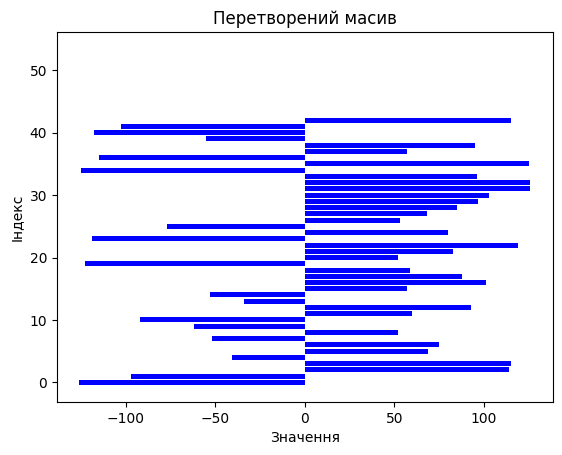

Перетворений масив: [-126  -97  114  115  -41   69   75  -52   52  -62  -92   60   93  -34
  -53   57  101   88   59 -123   52   83  119 -119   80  -77   53   68
   85   97  103  126  126   96 -125  125 -115   57   95  -55 -118 -103
  115    0    0    0    0    0    0    0    0    0    0    0]


In [14]:
def transform_array(array, a, b):
    filtered_array = np.where((array >= a) & (array <= b), 0, array)
    non_zero_elements = filtered_array[filtered_array != 0]
    new_array = np.concatenate((non_zero_elements, np.zeros(len(array) - len(non_zero_elements), dtype=int)))
    
    plt.barh(range(len(new_array)), new_array, color='blue')
    plt.xlabel("Значення")
    plt.ylabel("Індекс")
    plt.title("Перетворений масив")
    plt.show()
    
    print("Перетворений масив:", new_array)

transform_array(array_list, a, b)